# Proyek Analisis Data: Bike Sharing Dataset
* Nama: Rafi Achmad Romolo
* Email: rafiromolo@gmail.com
* Id Dicoding: rafiromolo

## Menentukan Pertanyaan Bisnis

* Pada hari apa orang sering meminjam sepeda?
* Pada musim apa orang biasa meminjam sepeda?
* Apakah kondisi cuaca mempengaruhi peminjaman sepeda?
* Apakah waktu mempengaruhi orang untuk meminjam sepeda?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Gathering day.csv
day_df = pd.read_csv("day.csv")
day_df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


Dataset explanation:
* instant: record index
* season: (1: spring, 2: summer, 3: fall, 4: winter)
* yr: year(0: 2011, 1: 2012)
* mnth: month(1 to 12)
* holiday: holiday or not
* weekday: day of the week(0: sunday, 6: saturday)
* workingday: 1 for workingday, 0 for otherwise
* weathersit: (1: Clear, Few clouds, Partly cloudy, Partly cloudy; 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist; 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds; 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp: normalized temp in Celcius (values are divided to 41 (max))
* atemp: normalized feeling temp in Celcius (values are divided to 50 (max))
* hum: normalized humidity (values are divided to 100 (max))
* windspeed: normalized wind speed (values are divided to 67 (max))
* casual: casual users
* registered: registered users
* cnt: total rental bikes including both casual and registered

In [3]:
# Gathering hour.csv
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Dataset explanation:
* instant: record index
* season: (1: spring, 2: summer, 3: fall, 4: winter)
* yr: year(0: 2011, 1: 2012)
* mnth: month(1 to 12)
* hr: hour(0 to 23)
* holiday: holiday or not
* weekday: day of the week(0: sunday, 6: saturday)
* workingday: 1 for workingday, 0 for otherwise
* weathersit: (1: Clear, Few clouds, Partly cloudy, Partly cloudy; 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist; 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds; 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp: normalized temp in Celcius (values are divided to 41 (max))
* atemp: normalized feeling temp in Celcius (values are divided to 50 (max))
* hum: normalized humidity (values are divided to 100 (max))
* windspeed: normalized wind speed (values are divided to 67 (max))
* casual: casual users
* registered: registered users
* cnt: total rental bikes including both casual and registered

### Assessing Data

In [4]:
# Assessing day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Wrong dtype:
* dteday -> should be a datetime dtype instead of an object dtype
* holiday -> should be a boolean dtype instead of an int64 dtype
* workingday -> should be a boolean dtype instead of an int64 dtype

In [5]:
print("NULL values: ", day_df.isna().sum())
print("\n")
print("Duplicated data: ", day_df.duplicated().sum())

NULL values:  instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Duplicated data:  0


No NULL value and no duplicated data.

In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Data that should changed:
1. season column -> change to season names.
2. yr -> change 0 to 2011 and 1 to 2012.
3. mnth -> change to month names.
4. weekday column -> change to day names.

In [7]:
# Assessing hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Wrong dtype:
* dteday -> should be a datetime dtype instead of an object dtype.
* holiday -> should be a boolean dtype instead of an int64 dtype
* workingday -> should be a boolean dtype instead of an int64 dtype

In [8]:
print("NULL values: ", hour_df.isna().sum())
print("\n")
print("Duplicated data: ", hour_df.duplicated().sum())

NULL values:  instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Duplicated data:  0


No NULL value and no duplicated data.

In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Data that should changed:
1. season column -> change to season names.
2. yr -> change 0 to 2011 and 1 to 2012.
3. mnth -> change to month names.
4. weekday column -> change to day names.

### Cleaning Data

Cleaning day_df list:
* Change dteday to a datetime dtype.
* Change holiday to a boolean dtype.
* Change workingday to a boolean dtype.
* season column -> change to season names.
* yr -> change 0 to 2011 and 1 to 2012.
* mnth -> change to month names.
* weekday column -> change to day names.

In [10]:
# Change datetime column into datetime dtype
datetime_columns = ["dteday"]

for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column])

In [11]:
# Change holiday and workingday columns into boolean dtype
day_df["holiday"] = day_df["holiday"].astype('bool')
day_df["workingday"] = day_df["workingday"].astype('bool')

In [12]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    bool          
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    bool          
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: bool(2), datetime64[ns]

In [13]:
# Change yr column data into their true names
day_df['yr'].replace(to_replace=0, value=2011, inplace=True)
day_df['yr'].replace(to_replace=1, value=2012, inplace=True)

In [14]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
48,49,2011-02-18,1,2011,2,False,5,True,1,0.521667,0.511983,0.516667,0.264925,579,2348,2927
542,543,2012-06-26,3,2012,6,False,2,True,1,0.630833,0.594704,0.373333,0.347642,1077,6365,7442
313,314,2011-11-10,4,2011,11,False,4,True,2,0.380000,0.373721,0.813333,0.189067,190,2743,2933
645,646,2012-10-07,4,2012,10,False,0,False,2,0.415833,0.419813,0.708333,0.141162,781,2729,3510
174,175,2011-06-24,3,2011,6,False,5,True,1,0.724167,0.656583,0.573333,0.222025,969,4022,4991


In [15]:
# Change datetime column into datetime dtype
datetime_columns = ["dteday"]

for column in datetime_columns:
    hour_df[column] = pd.to_datetime(hour_df[column])

In [16]:
# Change holiday and workingday columns into boolean dtype
hour_df["holiday"] = hour_df["holiday"].astype('bool')
hour_df["workingday"] = hour_df["workingday"].astype('bool')

In [17]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  bool          
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  bool          
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [18]:
# Change yr column data into their true names
hour_df['yr'].replace(to_replace=0, value=2011, inplace=True)
hour_df['yr'].replace(to_replace=1, value=2012, inplace=True)

In [19]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14331,14332,2012-08-25,3,2012,8,8,False,6,False,2,0.66,0.6212,0.74,0.2537,29,133,162
11278,11279,2012-04-20,2,2012,4,3,False,5,True,1,0.44,0.4394,0.88,0.1045,1,9,10
6188,6189,2011-09-20,3,2011,9,10,False,2,True,3,0.56,0.5303,0.88,0.1642,4,26,30
14089,14090,2012-08-15,3,2012,8,6,False,3,True,1,0.64,0.5909,0.78,0.1045,12,160,172
13168,13169,2012-07-07,3,2012,7,21,False,6,False,1,0.88,0.7879,0.37,0.1940,51,150,201


## Exploratory Data Analysis (EDA)

### Explore bike sharing based on time in day_df

In [20]:
day_df.describe(include='all')

C:\Users\USER\AppData\Local\Temp\ipykernel_3504\1011100427.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include='all')


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,710,NaN,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,2011.500684,6.519836,NaN,2.997264,NaN,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,NaN,2.004787,NaN,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,2011.000000,1.000000,NaN,0.000000,NaN,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,2011.000000,4.000000,NaN,1.000000,NaN,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [21]:
hour_df.describe(include='all')

C:\Users\USER\AppData\Local\Temp\ipykernel_3504\2781978731.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include='all')


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,16879,NaN,11865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,2011.502561,6.537775,11.546752,NaN,3.003683,NaN,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,NaN,2.005771,NaN,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,2011.000000,1.000000,0.000000,NaN,0.000000,NaN,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,2011.000000,4.000000,6.000000,NaN,1.000000,NaN,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


In [22]:
day_df.groupby(by='yr').agg({
    'casual': ['sum', 'mean'],
    'registered': ['sum', 'mean'],
    'cnt': ['sum', 'mean']
})

casual              registered                   cnt             
         sum         mean        sum         mean      sum         mean
yr                                                                     
2011  247252   677.402740     995851  2728.358904  1243103  3405.761644
2012  372765  1018.483607    1676811  4581.450820  2049576  5599.934426

In [23]:
day_df.groupby(by='mnth').agg({
    'casual': ['sum', 'mean'],
    'registered': ['sum', 'mean'],
    'cnt': ['sum', 'mean']
}).sort_values(by=('cnt', 'sum'), ascending=False)

casual              registered                  cnt             
        sum         mean        sum         mean     sum         mean
mnth                                                                 
8     72039  1161.919355     279155  4502.500000  351194  5664.419355
6     73906  1231.766667     272436  4540.600000  346342  5772.366667
9     70323  1172.050000     275668  4594.466667  345991  5766.516667
7     78157  1260.596774     266791  4303.080645  344948  5563.677419
5     75285  1214.274194     256401  4135.500000  331686  5349.774194
10    59760   963.870968     262592  4235.354839  322352  5199.225806
4     60802  1013.366667     208292  3471.533333  269094  4484.900000
11    36603   610.050000     218228  3637.133333  254831  4247.183333
3     44444   716.838710     184476  2975.419355  228920  3692.258065
12    21693   349.887097     189343  3053.919355  211036  3403.806452
2     14963   262.508772     136389  2392.789474  151352  2655.298246
1     12042   194.225806     122891  1982.112903  134933  2176.338710

In [24]:
day_df.groupby(by='weekday').agg({
    'casual': ['sum', 'mean'],
    'registered': ['sum', 'mean'],
    'cnt': ['sum', 'mean']
}).sort_values(by=('cnt', 'sum'), ascending=False)

casual              registered                  cnt             
            sum         mean        sum         mean     sum         mean
weekday                                                                  
5         78238   752.288462     409552  3938.000000  487790  4690.288462
4         61460   590.961538     423935  4076.298077  485395  4667.259615
6        153852  1465.257143     323955  3085.285714  477807  4550.542857
3         57319   551.144231     415729  3997.394231  473048  4548.538462
2         57843   556.182692     411266  3954.480769  469109  4510.663462
1         70784   674.133333     384719  3663.990476  455503  4338.123810
0        140521  1338.295238     303506  2890.533333  444027  4228.828571

In [25]:
day_df.groupby(by='holiday').agg({
    'casual': ['sum', 'mean'],
    'registered': ['sum', 'mean'],
    'cnt': ['sum', 'mean']
})

casual              registered                   cnt             
            sum         mean        sum         mean      sum         mean
holiday                                                                   
False    597658   841.771831    2616586  3685.332394  3214244  4527.104225
True      22359  1064.714286      56076  2670.285714    78435  3735.000000

In [26]:
day_df.groupby(by='workingday').agg({
    'casual': ['sum', 'mean'],
    'registered': ['sum', 'mean'],
    'cnt': ['sum', 'mean']
})

casual              registered                   cnt             
               sum         mean        sum         mean      sum         mean
workingday                                                                   
False       316732  1371.134199     683537  2959.034632  1000269  4330.168831
True        303285   606.570000    1989125  3978.250000  2292410  4584.820000

In [27]:
hour_df["hr_group"] = hour_df.hr.apply(lambda x: 1 if x <= 6 else (2 if 6 < x <= 12 else (3 if 12 < x <= 18 else 4)))
hour_df.groupby(by="hr_group").cnt.sum().sort_values(ascending=False).head()

hr_group
3    1418100
2    1036601
4     676337
1     161641
Name: cnt, dtype: int64

In [28]:
hour_df.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr_group
1425,1426,2011-03-04,1,2011,3,16,False,5,True,1,0.36,0.3485,0.46,0.1940,17,101,118,3
12022,12023,2012-05-21,2,2012,5,3,False,1,True,2,0.56,0.5303,0.88,0.2985,0,2,2,1
11875,11876,2012-05-15,2,2012,5,0,False,2,True,2,0.56,0.5303,0.88,0.1343,7,25,32,1
15793,15794,2012-10-25,4,2012,10,6,False,4,True,2,0.52,0.5000,0.88,0.1940,3,168,171,1
10757,10758,2012-03-29,2,2012,3,8,False,4,True,1,0.46,0.4545,0.47,0.4179,26,628,654,2
7933,7934,2011-12-02,4,2011,12,5,False,5,True,1,0.22,0.2576,0.80,0.0896,0,23,23,1
6227,6228,2011-09-22,3,2011,9,1,False,4,True,2,0.60,0.5152,0.94,0.0896,5,6,11,1
1843,1844,2011-03-22,2,2011,3,13,False,2,True,1,0.50,0.4848,0.45,0.2239,21,85,106,3
5247,5248,2011-08-11,3,2011,8,13,False,4,True,1,0.76,0.6667,0.31,0.2239,51,166,217,3
16603,16604,2012-11-29,4,2012,11,14,False,4,True,1,0.36,0.3485,0.43,0.2239,13,174,187,3


In [29]:
hour_df.to_csv("hour_updated.csv")

In [30]:
year11_df= day_df[day_df['yr'] == 2011]
year11_df.to_csv('day_2011.csv')

In [31]:
year12_df= day_df[day_df['yr'] == 2012]
year12_df.to_csv('day_2012.csv')

In [32]:
byyear_df = day_df.groupby(by='yr').agg({
    'casual': 'sum',
    'registered': 'sum',
}).reset_index()
byyear_df.rename(columns={
    "yr": "year",
}, inplace=True)
byyear_df.head()

,year,casual,registered
0,2011,247252,995851
1,2012,372765,1676811


In [33]:
month11_df = year11_df.groupby(by='mnth').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()
month11_df

,mnth,casual,registered,cnt
0,1,3073,35116,38189
1,2,6242,41973,48215
2,3,12826,51219,64045
3,4,22346,72524,94870
4,5,31050,104771,135821
5,6,30612,112900,143512
6,7,36452,104889,141341
7,8,28842,107849,136691
8,9,26545,100873,127418
9,10,25222,98289,123511


In [34]:
month12_df = year12_df.groupby(by='mnth').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()
month12_df

,mnth,casual,registered,cnt
0,1,8969,87775,96744
1,2,8721,94416,103137
2,3,31618,133257,164875
3,4,38456,135768,174224
4,5,44235,151630,195865
5,6,43294,159536,202830
6,7,41705,161902,203607
7,8,43197,171306,214503
8,9,43778,174795,218573
9,10,34538,164303,198841


In [35]:
byday11_df = year11_df.groupby(by=['mnth', 'weekday']).agg({
    'casual': 'sum',
    'registered': 'sum',
})
byday11_df.rename(columns={
    "mnth": "month",
    "weekday": "day"
}, inplace=True)
byday11_df

casual  registered
mnth weekday                    
1    0           726        4183
     1           406        6181
     2           346        5147
     3           219        4699
     4           224        5146
...              ...         ...
12   2           600       10429
     3           590        8817
     4           994       15255
     5          1361       14984
     6          2303       10736

[84 rows x 2 columns]

In [36]:
byday12_df = year12_df.groupby(by=['mnth', 'weekday']).agg({
    'casual': 'sum',
    'registered': 'sum',
})
byday12_df.rename(columns={
    "mnth": "month",
    "weekday": "day"
}, inplace=True)
byday12_df

casual  registered
mnth weekday                    
1    0          2323       10927
     1           838       11843
     2          1152       16465
     3           763       11428
     4           783       13953
...              ...         ...
12   2          1706       16971
     3           983       15773
     4          1326       15823
     5          1643       15694
     6          3235       15675

[84 rows x 2 columns]

In [37]:
d = {
    'day': ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], 
    'casual': [byday11_df.casual.iloc[0], byday11_df.casual.iloc[1], byday11_df.casual.iloc[2], byday11_df.casual.iloc[3], byday11_df.casual.iloc[4], byday11_df.casual.iloc[5], byday11_df.casual.iloc[6]], 
    'registered': [byday11_df.registered.iloc[0], byday11_df.registered.iloc[1], byday11_df.registered.iloc[2], byday11_df.registered.iloc[3], byday11_df.registered.iloc[4], byday11_df.registered.iloc[5], byday11_df.registered.iloc[6]]
}
jan11_df = pd.DataFrame(d)
jan11_df

,day,casual,registered
0,Sunday,726,4183
1,Monday,406,6181
2,Tuesday,346,5147
3,Wednesday,219,4699
4,Thursday,224,5146
5,Friday,315,5326
6,Saturday,837,4434


In [38]:
d = {
    'day': ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], 
    'casual': [byday12_df.casual.iloc[0], byday12_df.casual.iloc[1], byday12_df.casual.iloc[2], byday12_df.casual.iloc[3], byday12_df.casual.iloc[4], byday12_df.casual.iloc[5], byday12_df.casual.iloc[6]], 
    'registered': [byday12_df.registered.iloc[0], byday12_df.registered.iloc[1], byday12_df.registered.iloc[2], byday12_df.registered.iloc[3], byday12_df.registered.iloc[4], byday12_df.registered.iloc[5], byday12_df.registered.iloc[6]]
}
jan12_df = pd.DataFrame(d)
jan12_df

,day,casual,registered
0,Sunday,2323,10927
1,Monday,838,11843
2,Tuesday,1152,16465
3,Wednesday,763,11428
4,Thursday,783,13953
5,Friday,865,13066
6,Saturday,2245,10093


In [39]:
d = {
    'day': ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], 
    'casual': [byday11_df.casual.iloc[7], byday11_df.casual.iloc[8], byday11_df.casual.iloc[9], byday11_df.casual.iloc[10], byday11_df.casual.iloc[11], byday11_df.casual.iloc[12], byday11_df.casual.iloc[13]], 
    'registered': [byday11_df.registered.iloc[7], byday11_df.registered.iloc[8], byday11_df.registered.iloc[9], byday11_df.registered.iloc[10], byday11_df.registered.iloc[11], byday11_df.registered.iloc[12], byday11_df.registered.iloc[13]]
}
feb11_df = pd.DataFrame(d)
feb11_df

,day,casual,registered
0,Sunday,2084,5342
1,Monday,604,5574
2,Tuesday,325,5830
3,Wednesday,482,6681
4,Thursday,467,6903
5,Friday,936,6906
6,Saturday,1344,4737


In [40]:
d = {
    'day': ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], 
    'casual': [byday12_df.casual.iloc[7], byday12_df.casual.iloc[8], byday12_df.casual.iloc[9], byday12_df.casual.iloc[10], byday12_df.casual.iloc[11], byday12_df.casual.iloc[12], byday12_df.casual.iloc[13]], 
    'registered': [byday12_df.registered.iloc[7], byday12_df.registered.iloc[8], byday12_df.registered.iloc[9], byday12_df.registered.iloc[10], byday12_df.registered.iloc[11], byday12_df.registered.iloc[12], byday12_df.registered.iloc[13]]
}
feb12_df = pd.DataFrame(d)
feb12_df

,day,casual,registered
0,Sunday,1524,9030
1,Monday,1055,13602
2,Tuesday,726,15711
3,Wednesday,1013,17144
4,Thursday,943,14715
5,Friday,1132,14491
6,Saturday,2328,9723


In [41]:
d = {
    'day': ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], 
    'casual': [byday11_df.casual.iloc[14], byday11_df.casual.iloc[15], byday11_df.casual.iloc[16], byday11_df.casual.iloc[17], byday11_df.casual.iloc[18], byday11_df.casual.iloc[19], byday11_df.casual.iloc[20]], 
    'registered': [byday11_df.registered.iloc[14], byday11_df.registered.iloc[15], byday11_df.registered.iloc[16], byday11_df.registered.iloc[17], byday11_df.registered.iloc[18], byday11_df.registered.iloc[19], byday11_df.registered.iloc[20]]
}
mar11_df = pd.DataFrame(d)
mar11_df

,day,casual,registered
0,Sunday,2615,4571
1,Monday,1226,6797
2,Tuesday,1519,9649
3,Wednesday,1114,8760
4,Thursday,938,7664
5,Friday,1645,7725
6,Saturday,3769,6053


In [42]:
d = {
    'day': ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], 
    'casual': [byday12_df.casual.iloc[14], byday12_df.casual.iloc[15], byday12_df.casual.iloc[16], byday12_df.casual.iloc[17], byday12_df.casual.iloc[18], byday12_df.casual.iloc[19], byday12_df.casual.iloc[20]], 
    'registered': [byday12_df.registered.iloc[14], byday12_df.registered.iloc[15], byday12_df.registered.iloc[16], byday12_df.registered.iloc[17], byday12_df.registered.iloc[18], byday12_df.registered.iloc[19], byday12_df.registered.iloc[20]]
}
mar12_df = pd.DataFrame(d)
mar12_df

,day,casual,registered
0,Sunday,6107,13115
1,Monday,2818,17524
2,Tuesday,2565,18433
3,Wednesday,3225,19931
4,Thursday,3984,25584
5,Friday,4506,21456
6,Saturday,8413,17214


In [43]:
d = {
    'day': ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], 
    'casual': [byday11_df.casual.iloc[21], byday11_df.casual.iloc[22], byday11_df.casual.iloc[23], byday11_df.casual.iloc[24], byday11_df.casual.iloc[25], byday11_df.casual.iloc[26], byday11_df.casual.iloc[27]], 
    'registered': [byday11_df.registered.iloc[21], byday11_df.registered.iloc[22], byday11_df.registered.iloc[23], byday11_df.registered.iloc[24], byday11_df.registered.iloc[25], byday11_df.registered.iloc[26], byday11_df.registered.iloc[27]]
}
apr11_df = pd.DataFrame(d)
apr11_df

,day,casual,registered
0,Sunday,6107,7972
1,Monday,3031,10934
2,Tuesday,1511,9922
3,Wednesday,1782,11004
4,Thursday,2414,12241
5,Friday,2176,10926
6,Saturday,5325,9525


In [44]:
d = {
    'day': ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], 
    'casual': [byday12_df.casual.iloc[21], byday12_df.casual.iloc[22], byday12_df.casual.iloc[23], byday12_df.casual.iloc[24], byday12_df.casual.iloc[25], byday12_df.casual.iloc[26], byday12_df.casual.iloc[27]], 
    'registered': [byday12_df.registered.iloc[21], byday12_df.registered.iloc[22], byday12_df.registered.iloc[23], byday12_df.registered.iloc[24], byday12_df.registered.iloc[25], byday12_df.registered.iloc[26], byday12_df.registered.iloc[27]]
}
apr12_df = pd.DataFrame(d)
apr12_df

,day,casual,registered
0,Sunday,9772,15901
1,Monday,4171,22506
2,Tuesday,3674,21340
3,Wednesday,2542,19319
4,Thursday,3176,20281
5,Friday,5413,20968
6,Saturday,9708,15453


In [45]:
d = {
    'day': ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], 
    'casual': [byday11_df.casual.iloc[28], byday11_df.casual.iloc[29], byday11_df.casual.iloc[30], byday11_df.casual.iloc[31], byday11_df.casual.iloc[32], byday11_df.casual.iloc[33], byday11_df.casual.iloc[34]], 
    'registered': [byday11_df.registered.iloc[28], byday11_df.registered.iloc[29], byday11_df.registered.iloc[30], byday11_df.registered.iloc[31], byday11_df.registered.iloc[32], byday11_df.registered.iloc[33], byday11_df.registered.iloc[34]]
}
may11_df = pd.DataFrame(d)
may11_df

,day,casual,registered
0,Sunday,8052,13633
1,Monday,4669,16424
2,Tuesday,3307,18544
3,Wednesday,2081,13567
4,Thursday,2802,15747
5,Friday,3366,14943
6,Saturday,6773,11913


In [46]:
d = {
    'day': ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], 
    'casual': [byday12_df.casual.iloc[28], byday12_df.casual.iloc[29], byday12_df.casual.iloc[30], byday12_df.casual.iloc[31], byday12_df.casual.iloc[32], byday12_df.casual.iloc[33], byday12_df.casual.iloc[34]], 
    'registered': [byday12_df.registered.iloc[28], byday12_df.registered.iloc[29], byday12_df.registered.iloc[30], byday12_df.registered.iloc[31], byday12_df.registered.iloc[32], byday12_df.registered.iloc[33], byday12_df.registered.iloc[34]]
}
may12_df = pd.DataFrame(d)
may12_df

,day,casual,registered
0,Sunday,10294,15903
1,Monday,4537,14981
2,Tuesday,3715,24684
3,Wednesday,3789,26636
4,Thursday,5191,29294
5,Friday,5326,22373
6,Saturday,11383,17759


In [47]:
d = {
    'day': ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], 
    'casual': [byday11_df.casual.iloc[35], byday11_df.casual.iloc[36], byday11_df.casual.iloc[37], byday11_df.casual.iloc[38], byday11_df.casual.iloc[39], byday11_df.casual.iloc[40], byday11_df.casual.iloc[41]], 
    'registered': [byday11_df.registered.iloc[35], byday11_df.registered.iloc[36], byday11_df.registered.iloc[37], byday11_df.registered.iloc[38], byday11_df.registered.iloc[39], byday11_df.registered.iloc[40], byday11_df.registered.iloc[41]]
}
jun11_df = pd.DataFrame(d)
jun11_df

,day,casual,registered
0,Sunday,6711,12704
1,Monday,3089,15197
2,Tuesday,2996,16211
3,Wednesday,3467,19820
4,Thursday,3617,19338
5,Friday,3545,16188
6,Saturday,7187,13442


In [48]:
d = {
    'day': ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], 
    'casual': [byday12_df.casual.iloc[35], byday12_df.casual.iloc[36], byday12_df.casual.iloc[37], byday12_df.casual.iloc[38], byday12_df.casual.iloc[39], byday12_df.casual.iloc[40], byday12_df.casual.iloc[41]], 
    'registered': [byday12_df.registered.iloc[35], byday12_df.registered.iloc[36], byday12_df.registered.iloc[37], byday12_df.registered.iloc[38], byday12_df.registered.iloc[39], byday12_df.registered.iloc[40], byday12_df.registered.iloc[41]]
}
jun12_df = pd.DataFrame(d)
jun12_df

,day,casual,registered
0,Sunday,9903,18205
1,Monday,3880,21660
2,Tuesday,3490,22750
3,Wednesday,4149,23873
4,Thursday,3917,23724
5,Friday,5377,25437
6,Saturday,12578,23887


In [49]:
d = {
    'day': ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], 
    'casual': [byday11_df.casual.iloc[42], byday11_df.casual.iloc[43], byday11_df.casual.iloc[44], byday11_df.casual.iloc[45], byday11_df.casual.iloc[46], byday11_df.casual.iloc[47], byday11_df.casual.iloc[48]], 
    'registered': [byday11_df.registered.iloc[42], byday11_df.registered.iloc[43], byday11_df.registered.iloc[44], byday11_df.registered.iloc[45], byday11_df.registered.iloc[46], byday11_df.registered.iloc[47], byday11_df.registered.iloc[48]]
}
jul11_df = pd.DataFrame(d)
jul11_df

,day,casual,registered
0,Sunday,8605,14135
1,Monday,5197,13230
2,Tuesday,3195,14859
3,Wednesday,2931,15028
4,Thursday,2880,14970
5,Friday,4488,17685
6,Saturday,9156,14982


In [50]:
d = {
    'day': ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], 
    'casual': [byday12_df.casual.iloc[42], byday12_df.casual.iloc[43], byday12_df.casual.iloc[44], byday12_df.casual.iloc[45], byday12_df.casual.iloc[46], byday12_df.casual.iloc[47], byday12_df.casual.iloc[48]], 
    'registered': [byday12_df.registered.iloc[42], byday12_df.registered.iloc[43], byday12_df.registered.iloc[44], byday12_df.registered.iloc[45], byday12_df.registered.iloc[46], byday12_df.registered.iloc[47], byday12_df.registered.iloc[48]]
}
jul12_df = pd.DataFrame(d)
jul12_df

,day,casual,registered
0,Sunday,9241,21000
1,Monday,5165,28532
2,Tuesday,5035,29509
3,Wednesday,5719,22834
4,Thursday,4361,22778
5,Friday,4883,21597
6,Saturday,7301,15652


In [51]:
d = {
    'day': ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], 
    'casual': [byday11_df.casual.iloc[49], byday11_df.casual.iloc[50], byday11_df.casual.iloc[51], byday11_df.casual.iloc[52], byday11_df.casual.iloc[53], byday11_df.casual.iloc[54], byday11_df.casual.iloc[55]], 
    'registered': [byday11_df.registered.iloc[49], byday11_df.registered.iloc[50], byday11_df.registered.iloc[51], byday11_df.registered.iloc[52], byday11_df.registered.iloc[53], byday11_df.registered.iloc[54], byday11_df.registered.iloc[55]]
}
aug11_df = pd.DataFrame(d)
aug11_df

,day,casual,registered
0,Sunday,5300,10512
1,Monday,3912,18410
2,Tuesday,4485,20786
3,Wednesday,3656,19580
4,Thursday,2685,14030
5,Friday,3639,14946
6,Saturday,5165,9585


In [52]:
d = {
    'day': ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], 
    'casual': [byday12_df.casual.iloc[49], byday12_df.casual.iloc[50], byday12_df.casual.iloc[51], byday12_df.casual.iloc[52], byday12_df.casual.iloc[53], byday12_df.casual.iloc[54], byday12_df.casual.iloc[55]], 
    'registered': [byday12_df.registered.iloc[49], byday12_df.registered.iloc[50], byday12_df.registered.iloc[51], byday12_df.registered.iloc[52], byday12_df.registered.iloc[53], byday12_df.registered.iloc[54], byday12_df.registered.iloc[55]]
}
aug12_df = pd.DataFrame(d)
aug12_df

,day,casual,registered
0,Sunday,6580,15232
1,Monday,4455,22888
2,Tuesday,4422,23681
3,Wednesday,5806,31727
4,Thursday,6052,31578
5,Friday,6634,28407
6,Saturday,9248,17793


In [53]:
d = {
    'day': ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], 
    'casual': [byday11_df.casual.iloc[56], byday11_df.casual.iloc[57], byday11_df.casual.iloc[58], byday11_df.casual.iloc[59], byday11_df.casual.iloc[60], byday11_df.casual.iloc[61], byday11_df.casual.iloc[62]], 
    'registered': [byday11_df.registered.iloc[56], byday11_df.registered.iloc[57], byday11_df.registered.iloc[58], byday11_df.registered.iloc[59], byday11_df.registered.iloc[60], byday11_df.registered.iloc[61], byday11_df.registered.iloc[62]]
}
sep11_df = pd.DataFrame(d)
sep11_df

,day,casual,registered
0,Sunday,7051,12219
1,Monday,3301,13932
2,Tuesday,1820,13414
3,Wednesday,1784,13256
4,Thursday,2572,17678
5,Friday,3122,17506
6,Saturday,6895,12868


In [54]:
d = {
    'day': ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], 
    'casual': [byday12_df.casual.iloc[56], byday12_df.casual.iloc[57], byday12_df.casual.iloc[58], byday12_df.casual.iloc[59], byday12_df.casual.iloc[60], byday12_df.casual.iloc[61], byday12_df.casual.iloc[62]], 
    'registered': [byday12_df.registered.iloc[56], byday12_df.registered.iloc[57], byday12_df.registered.iloc[58], byday12_df.registered.iloc[59], byday12_df.registered.iloc[60], byday12_df.registered.iloc[61], byday12_df.registered.iloc[62]]
}
sep12_df = pd.DataFrame(d)
sep12_df

,day,casual,registered
0,Sunday,11818,24348
1,Monday,5106,22758
2,Tuesday,3153,23089
3,Wednesday,3457,26849
4,Thursday,3355,25765
5,Friday,4719,26376
6,Saturday,12170,25610


In [55]:
d = {
    'day': ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], 
    'casual': [byday11_df.casual.iloc[63], byday11_df.casual.iloc[64], byday11_df.casual.iloc[65], byday11_df.casual.iloc[66], byday11_df.casual.iloc[67], byday11_df.casual.iloc[68], byday11_df.casual.iloc[69]], 
    'registered': [byday11_df.registered.iloc[63], byday11_df.registered.iloc[64], byday11_df.registered.iloc[65], byday11_df.registered.iloc[66], byday11_df.registered.iloc[67], byday11_df.registered.iloc[68], byday11_df.registered.iloc[69]]
}
oct11_df = pd.DataFrame(d)
oct11_df

,day,casual,registered
0,Sunday,7265,13917
1,Monday,3618,17495
2,Tuesday,2485,15969
3,Wednesday,1434,12126
4,Thursday,1640,12892
5,Friday,2610,14070
6,Saturday,6170,11820


In [56]:
d = {
    'day': ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], 
    'casual': [byday12_df.casual.iloc[63], byday12_df.casual.iloc[64], byday12_df.casual.iloc[65], byday12_df.casual.iloc[66], byday12_df.casual.iloc[67], byday12_df.casual.iloc[68], byday12_df.casual.iloc[69]], 
    'registered': [byday12_df.registered.iloc[63], byday12_df.registered.iloc[64], byday12_df.registered.iloc[65], byday12_df.registered.iloc[66], byday12_df.registered.iloc[67], byday12_df.registered.iloc[68], byday12_df.registered.iloc[69]]
}
oct12_df = pd.DataFrame(d)
oct12_df

,day,casual,registered
0,Sunday,5991,15441
1,Monday,3229,21982
2,Tuesday,2766,24361
3,Wednesday,3701,32282
4,Thursday,3608,26158
5,Friday,4511,23795
6,Saturday,10732,20284


In [57]:
d = {
    'day': ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], 
    'casual': [byday11_df.casual.iloc[70], byday11_df.casual.iloc[71], byday11_df.casual.iloc[72], byday11_df.casual.iloc[73], byday11_df.casual.iloc[74], byday11_df.casual.iloc[75], byday11_df.casual.iloc[76]], 
    'registered': [byday11_df.registered.iloc[70], byday11_df.registered.iloc[71], byday11_df.registered.iloc[72], byday11_df.registered.iloc[73], byday11_df.registered.iloc[74], byday11_df.registered.iloc[75], byday11_df.registered.iloc[76]]
}
nov11_df = pd.DataFrame(d)
nov11_df

,day,casual,registered
0,Sunday,3553,10404
1,Monday,1441,13712
2,Tuesday,1400,15589
3,Wednesday,1120,15171
4,Thursday,1207,10248
5,Friday,2250,11348
6,Saturday,4623,10101


In [58]:
d = {
    'day': ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], 
    'casual': [byday12_df.casual.iloc[70], byday12_df.casual.iloc[71], byday12_df.casual.iloc[72], byday12_df.casual.iloc[73], byday12_df.casual.iloc[74], byday12_df.casual.iloc[75], byday12_df.casual.iloc[76]], 
    'registered': [byday12_df.registered.iloc[70], byday12_df.registered.iloc[71], byday12_df.registered.iloc[72], byday12_df.registered.iloc[73], byday12_df.registered.iloc[74], byday12_df.registered.iloc[75], byday12_df.registered.iloc[76]]
}
nov12_df = pd.DataFrame(d)
nov12_df

,day,casual,registered
0,Sunday,4722,14330
1,Monday,2261,19853
2,Tuesday,1450,17923
3,Wednesday,1512,19424
4,Thursday,2324,22170
5,Friday,3776,23339
6,Saturday,4964,14616


In [59]:
d = {
    'day': ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], 
    'casual': [byday11_df.casual.iloc[77], byday11_df.casual.iloc[78], byday11_df.casual.iloc[79], byday11_df.casual.iloc[80], byday11_df.casual.iloc[81], byday11_df.casual.iloc[82], byday11_df.casual.iloc[83]], 
    'registered': [byday11_df.registered.iloc[77], byday11_df.registered.iloc[78], byday11_df.registered.iloc[79], byday11_df.registered.iloc[80], byday11_df.registered.iloc[81], byday11_df.registered.iloc[82], byday11_df.registered.iloc[83]]
}
dec11_df = pd.DataFrame(d)
dec11_df

,day,casual,registered
0,Sunday,1534,7879
1,Monday,1066,10775
2,Tuesday,600,10429
3,Wednesday,590,8817
4,Thursday,994,15255
5,Friday,1361,14984
6,Saturday,2303,10736


In [60]:
d = {
    'day': ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], 
    'casual': [byday12_df.casual.iloc[77], byday12_df.casual.iloc[78], byday12_df.casual.iloc[79], byday12_df.casual.iloc[80], byday12_df.casual.iloc[81], byday12_df.casual.iloc[82], byday12_df.casual.iloc[83]], 
    'registered': [byday12_df.registered.iloc[77], byday12_df.registered.iloc[78], byday12_df.registered.iloc[79], byday12_df.registered.iloc[80], byday12_df.registered.iloc[81], byday12_df.registered.iloc[82], byday12_df.registered.iloc[83]]
}
dec12_df = pd.DataFrame(d)
dec12_df

,day,casual,registered
0,Sunday,2643,12603
1,Monday,1709,17929
2,Tuesday,1706,16971
3,Wednesday,983,15773
4,Thursday,1326,15823
5,Friday,1643,15694
6,Saturday,3235,15675


### Explore bike sharing based on season in day_df

In [61]:
day_df['season'].unique().tolist()

[1, 2, 3, 4]

In [62]:
season11_df = year11_df.groupby(by='season').agg({
    'casual': 'sum',
    'registered': 'sum',
}).reset_index()
season11_df

,season,casual,registered
0,1,21425,128575
1,2,77564,269752
2,3,95450,324200
3,4,52813,273324


In [63]:
season12_df = year12_df.groupby(by='season').agg({
    'casual': 'sum',
    'registered': 'sum',
}).reset_index()
season12_df

,season,casual,registered
0,1,39197,282151
1,2,125958,445315
2,3,130641,510838
3,4,76969,438507


### Explore bike sharing based on weather in day_df

In [64]:
# Denormalize data temp
day_df['temp'] = day_df['temp'] * 41
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2011,1,False,6,False,2,14.110847,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,2011,1,False,0,False,2,14.902598,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,2011,1,False,1,True,1,8.050924,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,2011,1,False,2,True,1,8.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,2011,1,False,3,True,1,9.305237,0.229270,0.436957,0.186900,82,1518,1600


In [65]:
# Denormalize data atemp
day_df['atemp'] = day_df['atemp'] * 50
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2011,1,False,6,False,2,14.110847,18.18125,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,2011,1,False,0,False,2,14.902598,17.68695,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,2011,1,False,1,True,1,8.050924,9.47025,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,2011,1,False,2,True,1,8.200000,10.60610,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,2011,1,False,3,True,1,9.305237,11.46350,0.436957,0.186900,82,1518,1600


In [66]:
print(day_df['temp'].max(), day_df['atemp'].max())
print(day_df['temp'].min(), day_df['atemp'].min())

35.328347 42.0448
2.4243464 3.9534800000000003


In [67]:
# Classificate temp to 4 classes -> 0-12: cold, 12-25: good, 25-34: warm, >34: hot
day_df['temp_group'] = day_df.temp.apply(lambda x: "1" if x <= 12 else ("2" if 12 < x <= 25 else ("3" if 25 < x <= 34 else "4")))
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_group
690,691,2012-11-21,4,2012,11,False,3,True,1,14.486653,18.24460,0.613750,0.103246,615,4531,5146,2
203,204,2011-07-23,3,2011,7,False,6,False,1,34.815847,40.21435,0.500000,0.131221,987,2298,3285,4
213,214,2011-08-02,3,2011,8,False,2,True,1,32.116653,35.35355,0.491250,0.205850,801,4044,4845,3
367,368,2012-01-03,1,2012,1,False,2,True,1,6.150000,6.31375,0.441250,0.365671,89,2147,2236,1
218,219,2011-08-07,3,2011,8,False,0,False,1,30.442500,35.76460,0.752917,0.201487,1298,2487,3785,3


In [68]:
temp_df = day_df.groupby(by='temp_group').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()
temp_df

,temp_group,casual,registered,cnt
0,1,26314,245498,271812
1,2,300864,1357026,1657890
2,3,287293,1051257,1338550
3,4,5546,18881,24427


In [69]:
# Classificate atemp to 4 classes -> 0-12: cold, 12-25: good, 25-34: warm, >34: hot
day_df['atemp_group'] = day_df.atemp.apply(lambda x: "1" if x <= 12 else ("2" if 12 < x <= 25 else ("3" if 25 < x <= 34 else "4")))
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_group,atemp_group
522,523,2012-06-06,2,2012,6,False,3,True,1,22.720847,27.11460,0.611250,0.077125,1027,6028,7055,2,3
571,572,2012-07-25,3,2012,7,False,3,True,1,29.690847,32.70270,0.450000,0.164800,1383,6790,8173,3,3
463,464,2012-04-08,2,2012,4,False,0,False,1,20.500000,24.62125,0.275833,0.232596,2230,2939,5169,2,2
441,442,2012-03-17,1,2012,3,False,6,False,2,21.080847,25.25230,0.755833,0.110704,3155,4681,7836,2,3
456,457,2012-04-01,2,2012,4,False,0,False,2,17.459153,20.86435,0.676250,0.172267,2347,3694,6041,2,2


In [70]:
atemp_df = day_df.groupby(by='atemp_group').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()
atemp_df

,atemp_group,casual,registered,cnt
0,1,6532,79481,86013
1,2,188746,1019499,1208245
2,3,349014,1264825,1613839
3,4,75725,308857,384582


In [71]:
weather_df = day_df.groupby(by='weathersit').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()
weather_df

,weathersit,casual,registered,cnt
0,1,446346,1811606,2257952
1,2,169776,827082,996858
2,3,3895,33974,37869


In [72]:
weather_df.loc[len(weather_df.index)] = [4, 0, 0, 0]
weather_df

,weathersit,casual,registered,cnt
0,1,446346,1811606,2257952
1,2,169776,827082,996858
2,3,3895,33974,37869
3,4,0,0,0


### Explore bike sharing based on hour in hour_df

In [73]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr_group
2540,2541,2011-04-20,2,2011,4,18,False,3,True,1,0.74,0.6515,0.30,0.3582,56,385,441,3
15729,15730,2012-10-22,4,2012,10,14,False,1,True,1,0.62,0.6061,0.27,0.1940,73,209,282,3
10013,10014,2012-02-27,1,2012,2,6,False,1,True,1,0.24,0.2273,0.70,0.2537,1,89,90,1
4889,4890,2011-07-27,3,2011,7,15,False,3,True,1,0.86,0.7424,0.26,0.2537,37,103,140,3
13886,13887,2012-08-06,3,2012,8,19,False,1,True,1,0.78,0.7424,0.59,0.1940,109,531,640,4


In [74]:
hr_group_df = hour_df.groupby(by='hr_group').agg({
    'casual': 'sum',
    'registered': 'sum'
}).reset_index()
hr_group_df

,hr_group,casual,registered
0,1,22292,139349
1,2,173049,863552
2,3,314958,1103142
3,4,109718,566619


In [75]:
hour_season_df = hour_df.groupby(by=['hr_group', 'season']).agg({
    'casual': 'sum',
    'registered': 'sum'
})
hour_season_df

casual  registered
hr_group season                    
1        1         1838       19133
         2         6984       35517
         3         9009       47025
         4         4461       37674
2        1        16988      138723
         2        55745      226762
         3        62053      261260
         4        38263      236807
3        1        33996      172691
         2       104152      296358
         3       106792      335553
         4        70018      298540
4        1         7800       80179
         2        36641      156430
         3        48237      191200
         4        17040      138810

In [76]:
d = {
    'category': ['Midnight to Dawn', 'Dawn to Noon', 'Noon to Dusk', 'Dusk to Midnight'], 
    'casual': [hour_season_df.casual.iloc[0], hour_season_df.casual.iloc[1], hour_season_df.casual.iloc[2], hour_season_df.casual.iloc[3]], 
    'registered': [hour_season_df.registered.iloc[0], hour_season_df.registered.iloc[1], hour_season_df.registered.iloc[2], hour_season_df.registered.iloc[3]]
}
spring_hr_df = pd.DataFrame(d)
spring_hr_df

,category,casual,registered
0,Midnight to Dawn,1838,19133
1,Dawn to Noon,6984,35517
2,Noon to Dusk,9009,47025
3,Dusk to Midnight,4461,37674


In [77]:
d = {
    'category': ['Midnight to Dawn', 'Dawn to Noon', 'Noon to Dusk', 'Dusk to Midnight'], 
    'casual': [hour_season_df.casual.iloc[4], hour_season_df.casual.iloc[5], hour_season_df.casual.iloc[6], hour_season_df.casual.iloc[7]], 
    'registered': [hour_season_df.registered.iloc[4], hour_season_df.registered.iloc[5], hour_season_df.registered.iloc[6], hour_season_df.registered.iloc[7]]
}
summer_hr_df = pd.DataFrame(d)
summer_hr_df

,category,casual,registered
0,Midnight to Dawn,16988,138723
1,Dawn to Noon,55745,226762
2,Noon to Dusk,62053,261260
3,Dusk to Midnight,38263,236807


In [78]:
d = {
    'category': ['Midnight to Dawn', 'Dawn to Noon', 'Noon to Dusk', 'Dusk to Midnight'], 
    'casual': [hour_season_df.casual.iloc[8], hour_season_df.casual.iloc[9], hour_season_df.casual.iloc[10], hour_season_df.casual.iloc[11]], 
    'registered': [hour_season_df.registered.iloc[8], hour_season_df.registered.iloc[9], hour_season_df.registered.iloc[10], hour_season_df.registered.iloc[11]]
}
fall_hr_df = pd.DataFrame(d)
fall_hr_df

,category,casual,registered
0,Midnight to Dawn,33996,172691
1,Dawn to Noon,104152,296358
2,Noon to Dusk,106792,335553
3,Dusk to Midnight,70018,298540


In [79]:
d = {
    'category': ['Midnight to Dawn', 'Dawn to Noon', 'Noon to Dusk', 'Dusk to Midnight'], 
    'casual': [hour_season_df.casual.iloc[12], hour_season_df.casual.iloc[13], hour_season_df.casual.iloc[14], hour_season_df.casual.iloc[15]], 
    'registered': [hour_season_df.registered.iloc[12], hour_season_df.registered.iloc[13], hour_season_df.registered.iloc[14], hour_season_df.registered.iloc[15]]
}
winter_hr_df = pd.DataFrame(d)
winter_hr_df

,category,casual,registered
0,Midnight to Dawn,7800,80179
1,Dawn to Noon,36641,156430
2,Noon to Dusk,48237,191200
3,Dusk to Midnight,17040,138810


## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada hari apa orang sering meminjam sepeda?

<AxesSubplot:title={'center':'Users based on user category'}, xlabel='year'>

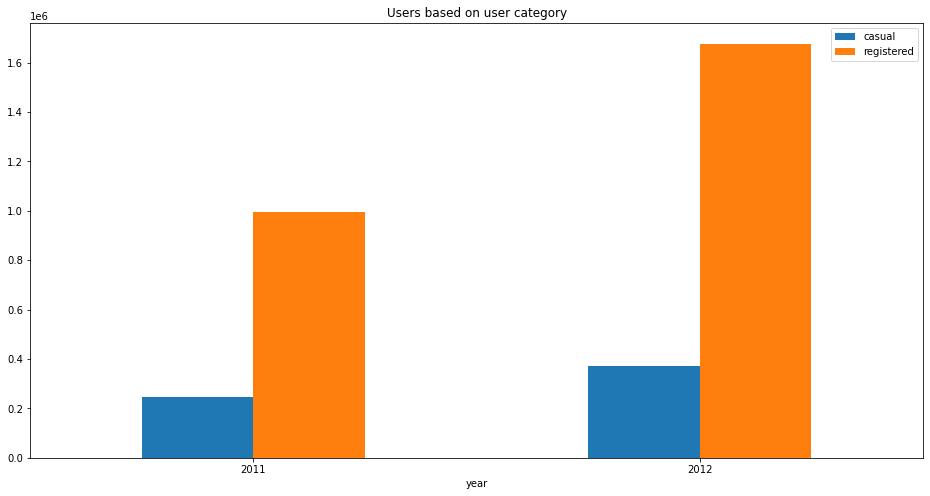

In [80]:
fig, ax = plt.subplots(figsize=(16,8))

byyear_df.plot(x='year', kind='bar', stacked=False, title='Users based on user category', rot=0, ax=ax)

In [81]:
month11_df['mnth'].replace(to_replace=1, value='Jan11', inplace=True)
month11_df['mnth'].replace(to_replace=2, value='Feb11', inplace=True)
month11_df['mnth'].replace(to_replace=3, value='Mar11', inplace=True)
month11_df['mnth'].replace(to_replace=4, value='Apr11', inplace=True)
month11_df['mnth'].replace(to_replace=5, value='May11', inplace=True)
month11_df['mnth'].replace(to_replace=6, value='Jun11', inplace=True)
month11_df['mnth'].replace(to_replace=7, value='Jul11', inplace=True)
month11_df['mnth'].replace(to_replace=8, value='Aug11', inplace=True)
month11_df['mnth'].replace(to_replace=9, value='Sep11', inplace=True)
month11_df['mnth'].replace(to_replace=10, value='Oct11', inplace=True)
month11_df['mnth'].replace(to_replace=11, value='Nov11', inplace=True)
month11_df['mnth'].replace(to_replace=12, value='Dec11', inplace=True)

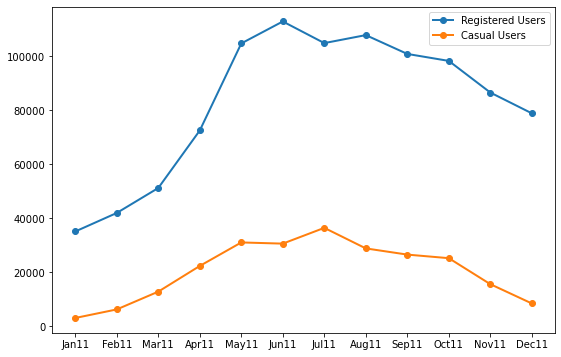

In [82]:
plt.figure(figsize=(9,6))

plt.plot(month11_df["mnth"], month11_df["registered"], marker='o', linewidth=2)
plt.plot(month11_df["mnth"], month11_df["casual"], marker='o', linewidth=2)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.legend(['Registered Users', 'Casual Users'])

plt.show()

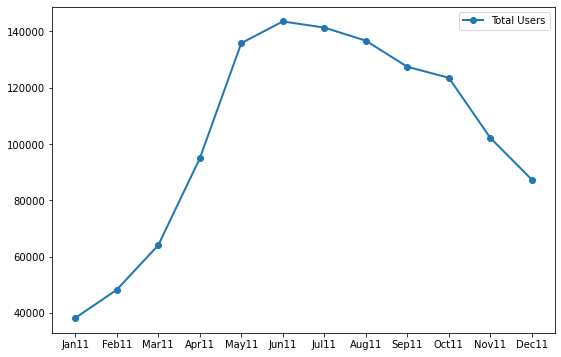

In [83]:
plt.figure(figsize=(9,6))

plt.plot(month11_df["mnth"], month11_df["cnt"], marker='o', linewidth=2)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.legend(['Total Users'])

plt.show()

In [84]:
month12_df['mnth'].replace(to_replace=1, value='Jan12', inplace=True)
month12_df['mnth'].replace(to_replace=2, value='Feb12', inplace=True)
month12_df['mnth'].replace(to_replace=3, value='Mar12', inplace=True)
month12_df['mnth'].replace(to_replace=4, value='Apr12', inplace=True)
month12_df['mnth'].replace(to_replace=5, value='May12', inplace=True)
month12_df['mnth'].replace(to_replace=6, value='Jun12', inplace=True)
month12_df['mnth'].replace(to_replace=7, value='Jul12', inplace=True)
month12_df['mnth'].replace(to_replace=8, value='Aug12', inplace=True)
month12_df['mnth'].replace(to_replace=9, value='Sep12', inplace=True)
month12_df['mnth'].replace(to_replace=10, value='Oct12', inplace=True)
month12_df['mnth'].replace(to_replace=11, value='Nov12', inplace=True)
month12_df['mnth'].replace(to_replace=12, value='Dec12', inplace=True)

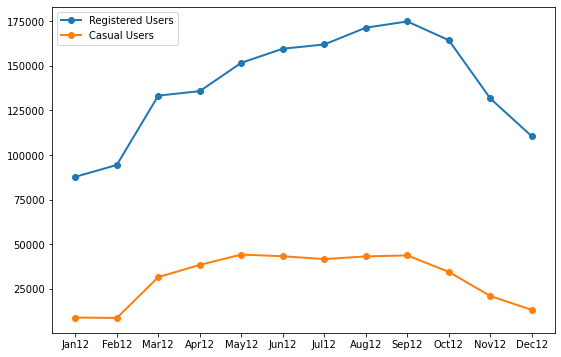

In [85]:
plt.figure(figsize=(9,6))

plt.plot(month12_df["mnth"], month12_df["registered"], marker='o', linewidth=2)
plt.plot(month12_df["mnth"], month12_df["casual"], marker='o', linewidth=2)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.legend(['Registered Users', 'Casual Users'])

plt.show()

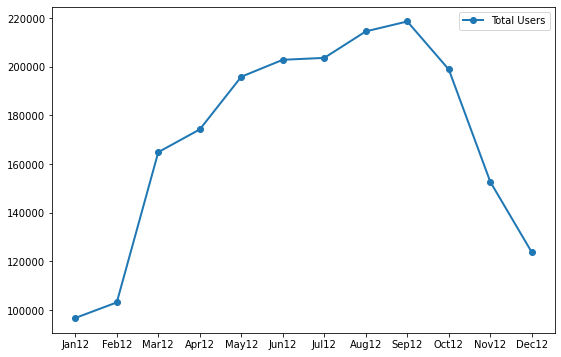

In [86]:
plt.figure(figsize=(9,6))

plt.plot(month12_df["mnth"], month12_df["cnt"], marker='o', linewidth=2)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.legend(['Total Users'])

plt.show()

<AxesSubplot:title={'center':'Users based on days (March 2011)'}, xlabel='day'>

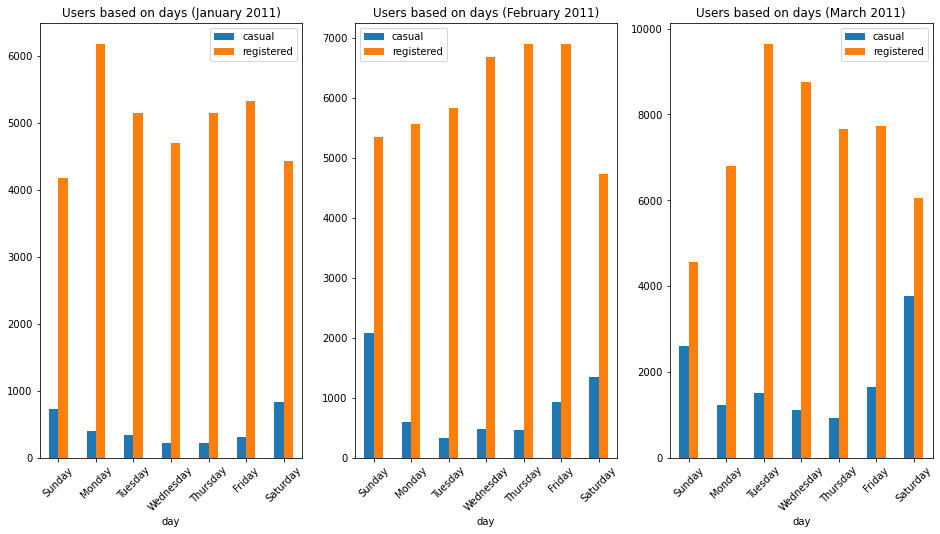

In [87]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,8))

jan11_df.plot(x='day', kind='bar', stacked=False, title='Users based on days (January 2011)', rot=45, ax=ax[0])
feb11_df.plot(x='day', kind='bar', stacked=False, title='Users based on days (February 2011)', rot=45, ax=ax[1])
mar11_df.plot(x='day', kind='bar', stacked=False, title='Users based on days (March 2011)', rot=45, ax=ax[2])

<AxesSubplot:title={'center':'Users based on days (June 2011)'}, xlabel='day'>

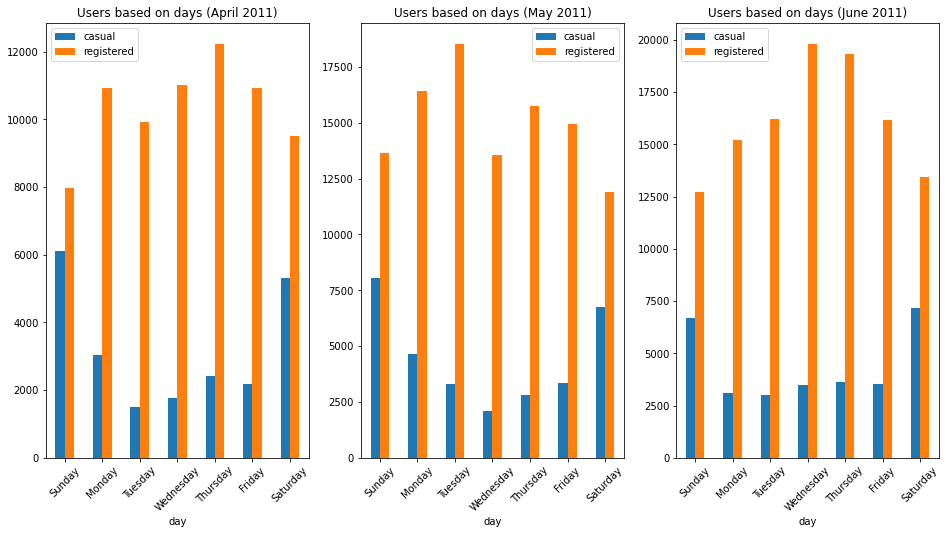

In [88]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,8))

apr11_df.plot(x='day', kind='bar', stacked=False, title='Users based on days (April 2011)', rot=45, ax=ax[0])
may11_df.plot(x='day', kind='bar', stacked=False, title='Users based on days (May 2011)', rot=45, ax=ax[1])
jun11_df.plot(x='day', kind='bar', stacked=False, title='Users based on days (June 2011)', rot=45, ax=ax[2])

<AxesSubplot:title={'center':'Users based on days (September 2011)'}, xlabel='day'>

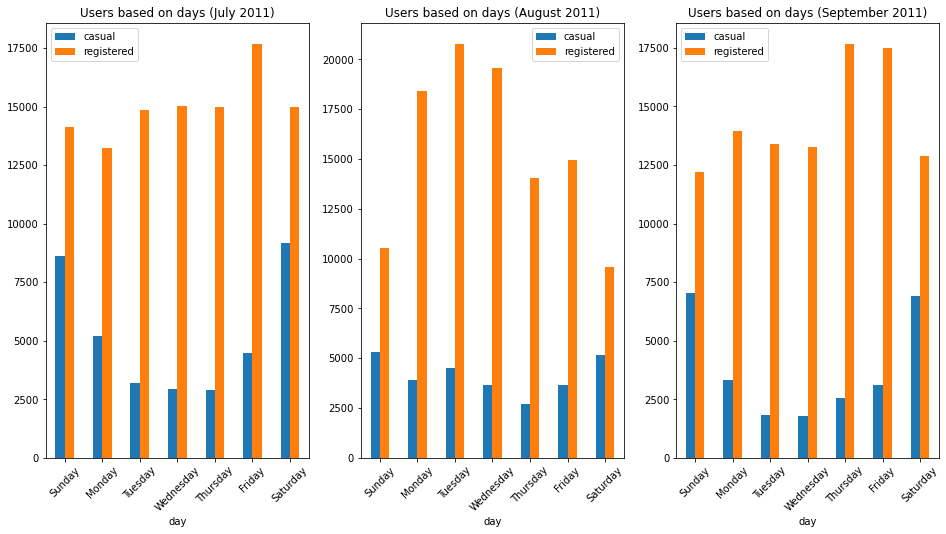

In [89]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,8))

jul11_df.plot(x='day', kind='bar', stacked=False, title='Users based on days (July 2011)', rot=45, ax=ax[0])
aug11_df.plot(x='day', kind='bar', stacked=False, title='Users based on days (August 2011)', rot=45, ax=ax[1])
sep11_df.plot(x='day', kind='bar', stacked=False, title='Users based on days (September 2011)', rot=45, ax=ax[2])

<AxesSubplot:title={'center':'Users based on days (December 2011)'}, xlabel='day'>

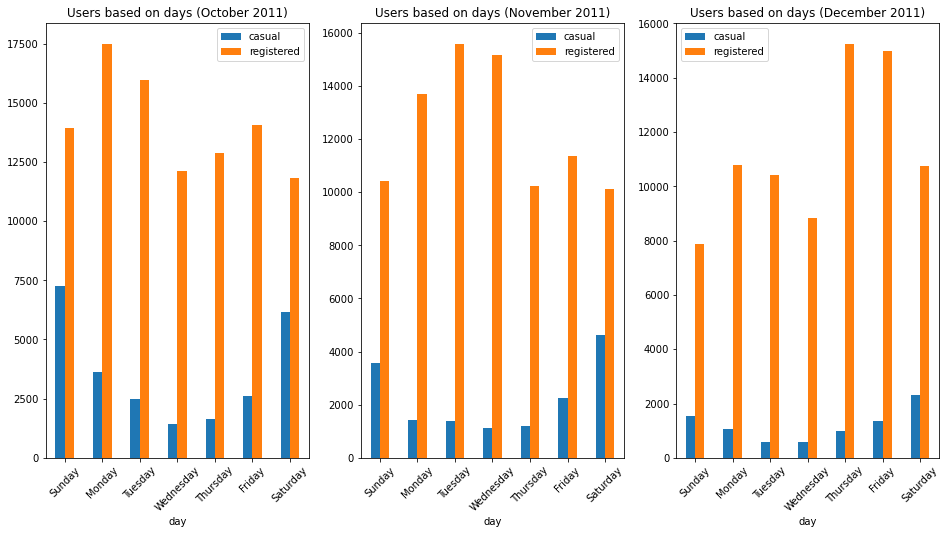

In [90]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,8))

oct11_df.plot(x='day', kind='bar', stacked=False, title='Users based on days (October 2011)', rot=45, ax=ax[0])
nov11_df.plot(x='day', kind='bar', stacked=False, title='Users based on days (November 2011)', rot=45, ax=ax[1])
dec11_df.plot(x='day', kind='bar', stacked=False, title='Users based on days (December 2011)', rot=45, ax=ax[2])

<AxesSubplot:title={'center':'Users based on days (March 2012)'}, xlabel='day'>

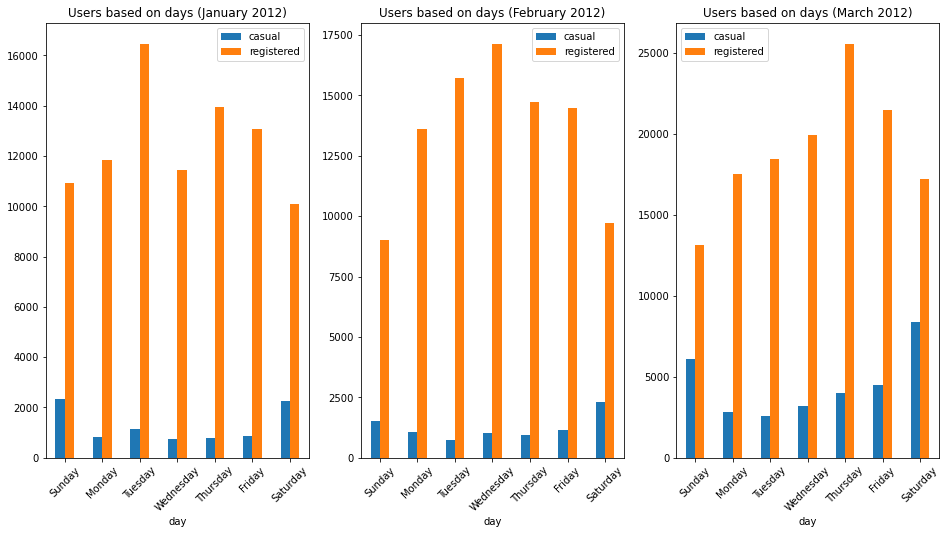

In [91]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,8))

jan12_df.plot(x='day', kind='bar', stacked=False, title='Users based on days (January 2012)', rot=45, ax=ax[0])
feb12_df.plot(x='day', kind='bar', stacked=False, title='Users based on days (February 2012)', rot=45, ax=ax[1])
mar12_df.plot(x='day', kind='bar', stacked=False, title='Users based on days (March 2012)', rot=45, ax=ax[2])

<AxesSubplot:title={'center':'Users based on days (June 2012)'}, xlabel='day'>

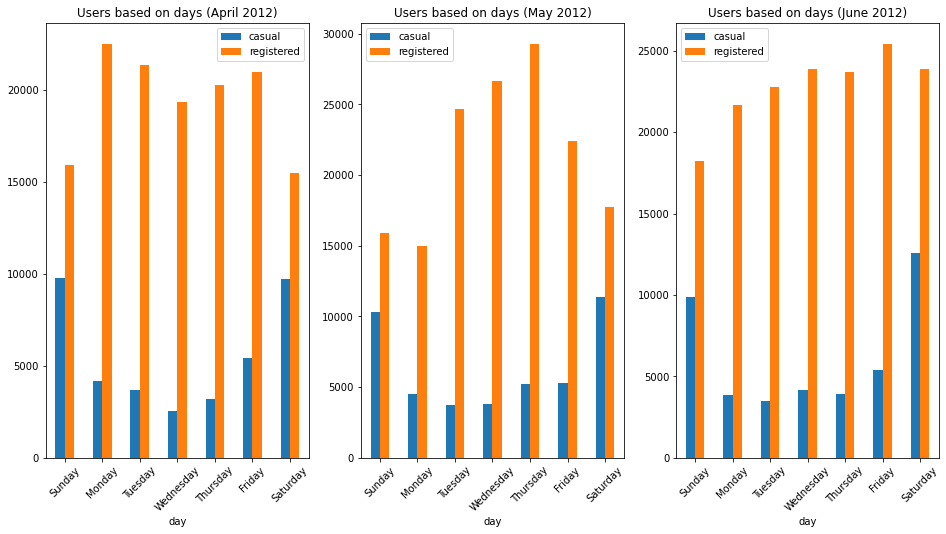

In [92]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,8))

apr12_df.plot(x='day', kind='bar', stacked=False, title='Users based on days (April 2012)', rot=45, ax=ax[0])
may12_df.plot(x='day', kind='bar', stacked=False, title='Users based on days (May 2012)', rot=45, ax=ax[1])
jun12_df.plot(x='day', kind='bar', stacked=False, title='Users based on days (June 2012)', rot=45, ax=ax[2])

<AxesSubplot:title={'center':'Users based on days (September 2012)'}, xlabel='day'>

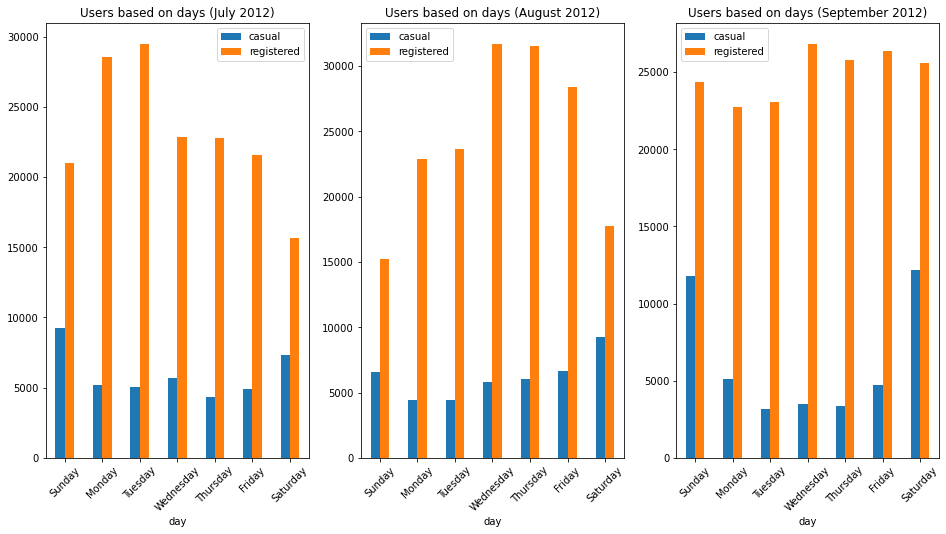

In [93]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,8))

jul12_df.plot(x='day', kind='bar', stacked=False, title='Users based on days (July 2012)', rot=45, ax=ax[0])
aug12_df.plot(x='day', kind='bar', stacked=False, title='Users based on days (August 2012)', rot=45, ax=ax[1])
sep12_df.plot(x='day', kind='bar', stacked=False, title='Users based on days (September 2012)', rot=45, ax=ax[2])

<AxesSubplot:title={'center':'Users based on days (December 2012)'}, xlabel='day'>

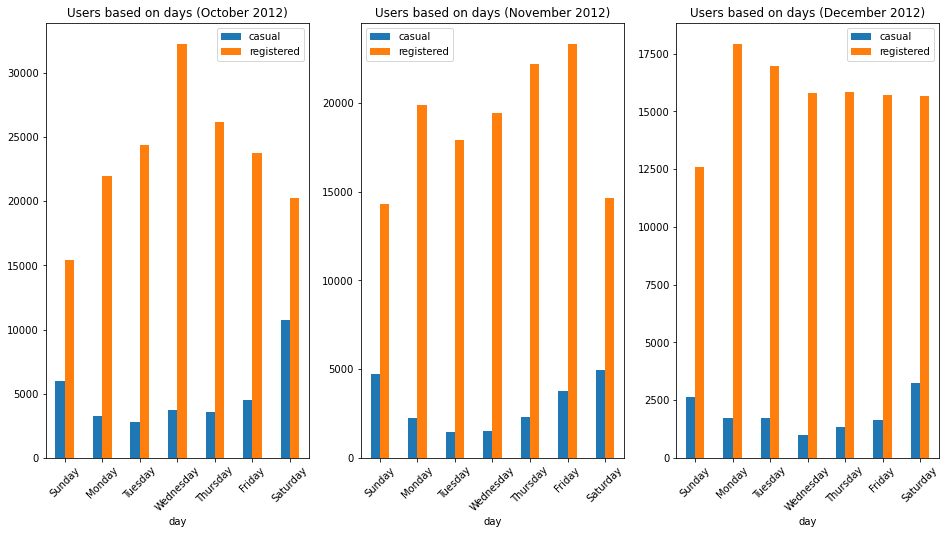

In [94]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,8))

oct12_df.plot(x='day', kind='bar', stacked=False, title='Users based on days (October 2012)', rot=45, ax=ax[0])
nov12_df.plot(x='day', kind='bar', stacked=False, title='Users based on days (November 2012)', rot=45, ax=ax[1])
dec12_df.plot(x='day', kind='bar', stacked=False, title='Users based on days (December 2012)', rot=45, ax=ax[2])

### Pertanyaan 2: Pada musim apa orang biasa meminjam sepeda?

In [95]:
season11_df['season'].replace(to_replace=1, value='Spring', inplace=True)
season11_df['season'].replace(to_replace=2, value='Summer', inplace=True)
season11_df['season'].replace(to_replace=3, value='Fall', inplace=True)
season11_df['season'].replace(to_replace=4, value='Winter', inplace=True)
season11_df

,season,casual,registered
0,Spring,21425,128575
1,Summer,77564,269752
2,Fall,95450,324200
3,Winter,52813,273324


In [96]:
season12_df['season'].replace(to_replace=1, value='Spring', inplace=True)
season12_df['season'].replace(to_replace=2, value='Summer', inplace=True)
season12_df['season'].replace(to_replace=3, value='Fall', inplace=True)
season12_df['season'].replace(to_replace=4, value='Winter', inplace=True)
season12_df

,season,casual,registered
0,Spring,39197,282151
1,Summer,125958,445315
2,Fall,130641,510838
3,Winter,76969,438507


<AxesSubplot:title={'center':'Users based on Season in 2012'}, xlabel='season'>

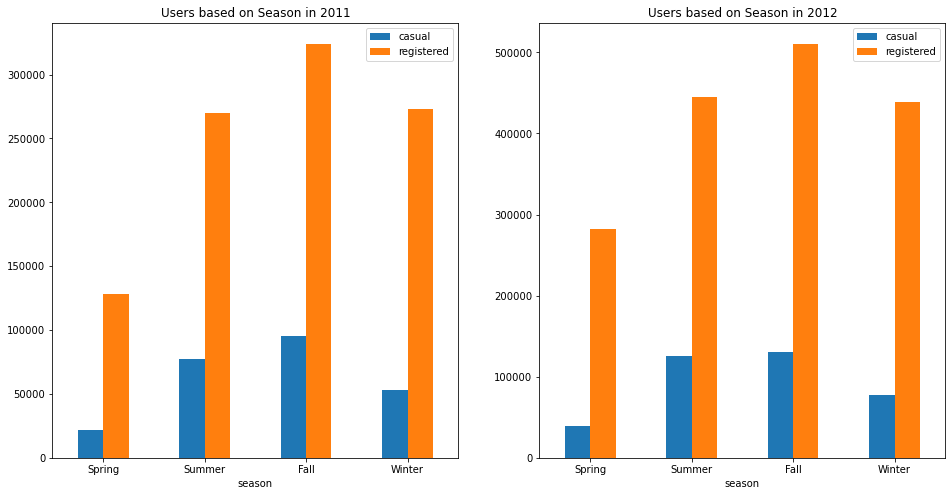

In [97]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

season11_df.plot(x='season', kind='bar', stacked=False, title='Users based on Season in 2011', rot=0, ax=ax[0])
season12_df.plot(x='season', kind='bar', stacked=False, title='Users based on Season in 2012', rot=0, ax=ax[1])

### Pertanyaan 3: Apakah kondisi cuaca mempengaruhi peminjaman sepeda?

In [98]:
temp_df['temp_group'].replace(to_replace='1', value='Cold (0-12)', inplace=True)
temp_df['temp_group'].replace(to_replace='2', value='Good (12-25)', inplace=True)
temp_df['temp_group'].replace(to_replace='3', value='Warm (25-34)', inplace=True)
temp_df['temp_group'].replace(to_replace='4', value='Hot (>34)', inplace=True)
temp_df

,temp_group,casual,registered,cnt
0,Cold (0-12),26314,245498,271812
1,Good (12-25),300864,1357026,1657890
2,Warm (25-34),287293,1051257,1338550
3,Hot (>34),5546,18881,24427


<AxesSubplot:title={'center':'Users based on temperature'}, xlabel='temp_group'>

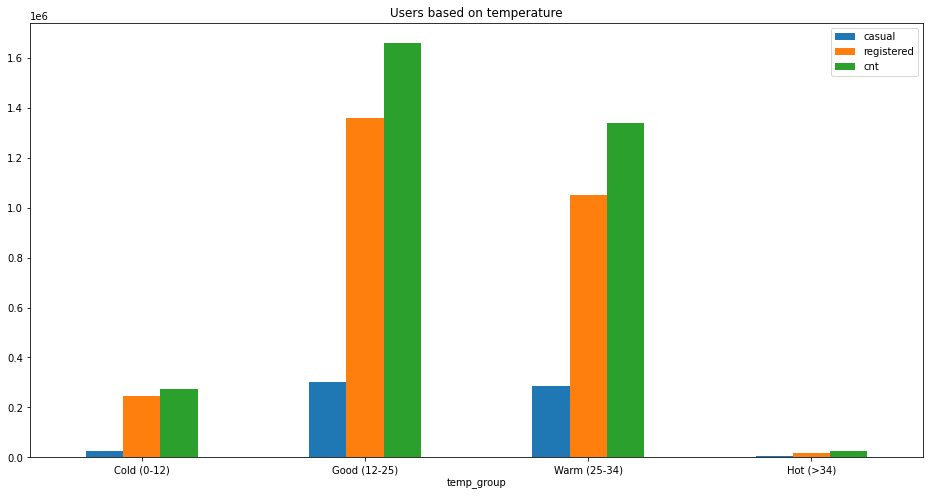

In [99]:
fig, ax = plt.subplots(figsize=(16,8))

temp_df.plot(x='temp_group', kind='bar', stacked=False, title='Users based on temperature', rot=0, ax=ax)

In [100]:
atemp_df['atemp_group'].replace(to_replace='1', value='Cold (0-12)', inplace=True)
atemp_df['atemp_group'].replace(to_replace='2', value='Good (12-25)', inplace=True)
atemp_df['atemp_group'].replace(to_replace='3', value='Warm (25-34)', inplace=True)
atemp_df['atemp_group'].replace(to_replace='4', value='Hot (>34)', inplace=True)
atemp_df

,atemp_group,casual,registered,cnt
0,Cold (0-12),6532,79481,86013
1,Good (12-25),188746,1019499,1208245
2,Warm (25-34),349014,1264825,1613839
3,Hot (>34),75725,308857,384582


<AxesSubplot:title={'center':'Users based on feeling temperature'}, xlabel='atemp_group'>

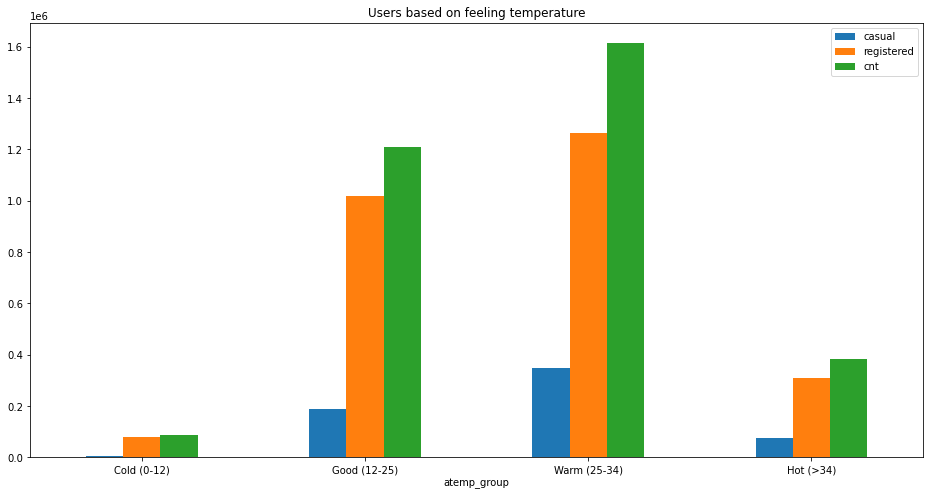

In [101]:
fig, ax = plt.subplots(figsize=(16,8))

atemp_df.plot(x='atemp_group', kind='bar', stacked=False, title='Users based on feeling temperature', rot=0, ax=ax)

In [102]:
weather_df['weathersit'].replace(to_replace=1, value='Clear, Few Clouds', inplace=True)
weather_df['weathersit'].replace(to_replace=2, value='Mist + Cloudy', inplace=True)
weather_df['weathersit'].replace(to_replace=3, value='Light Rain', inplace=True)
weather_df['weathersit'].replace(to_replace=4, value='Heavy Rain', inplace=True)
weather_df

,weathersit,casual,registered,cnt
0,"Clear, Few Clouds",446346,1811606,2257952
1,Mist + Cloudy,169776,827082,996858
2,Light Rain,3895,33974,37869
3,Heavy Rain,0,0,0


<AxesSubplot:title={'center':'Users based on weather situation'}, xlabel='weathersit'>

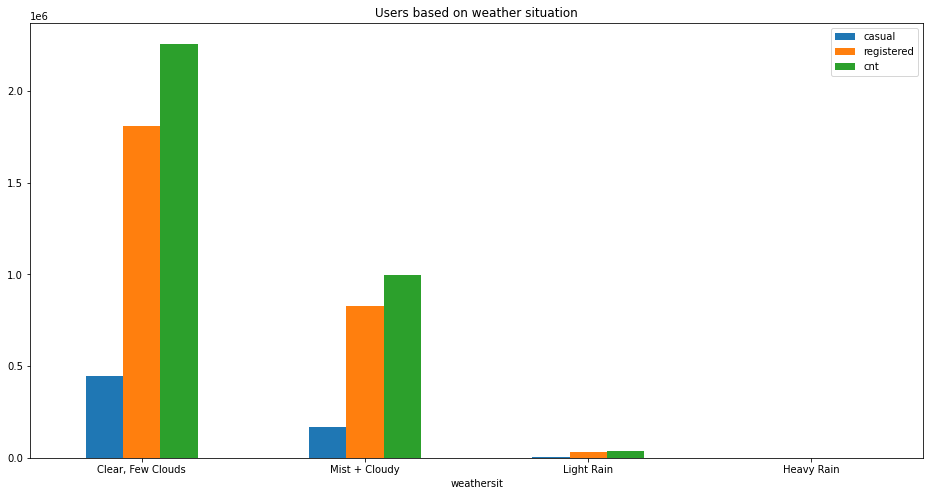

In [103]:
fig, ax = plt.subplots(figsize=(16,8))

weather_df.plot(x='weathersit', kind='bar', stacked=False, title='Users based on weather situation', rot=0, ax=ax)

In [104]:
day_df.to_csv("day_updated.csv")

### Pertanyaan 4: Apakah waktu mempengaruhi orang untuk meminjam sepeda?

In [105]:
hr_group_df['hr_group'].replace(to_replace=1, value='Midnight to Dawn', inplace=True)
hr_group_df['hr_group'].replace(to_replace=2, value='Dawn to Noon', inplace=True)
hr_group_df['hr_group'].replace(to_replace=3, value='Noon to Dusk', inplace=True)
hr_group_df['hr_group'].replace(to_replace=4, value='Dusk to Midnight', inplace=True)
hr_group_df

,hr_group,casual,registered
0,Midnight to Dawn,22292,139349
1,Dawn to Noon,173049,863552
2,Noon to Dusk,314958,1103142
3,Dusk to Midnight,109718,566619


<AxesSubplot:title={'center':'Users based on time'}, xlabel='hr_group'>

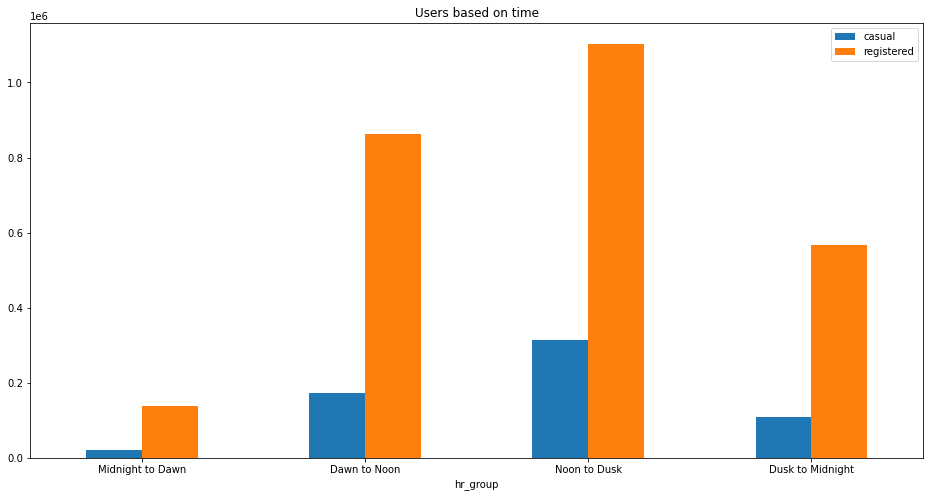

In [106]:
fig, ax = plt.subplots(figsize=(16,8))

hr_group_df.plot(x='hr_group', kind='bar', stacked=False, title='Users based on time', rot=0, ax=ax)

<AxesSubplot:title={'center':'Users based on time (Spring Season)'}, xlabel='category'>

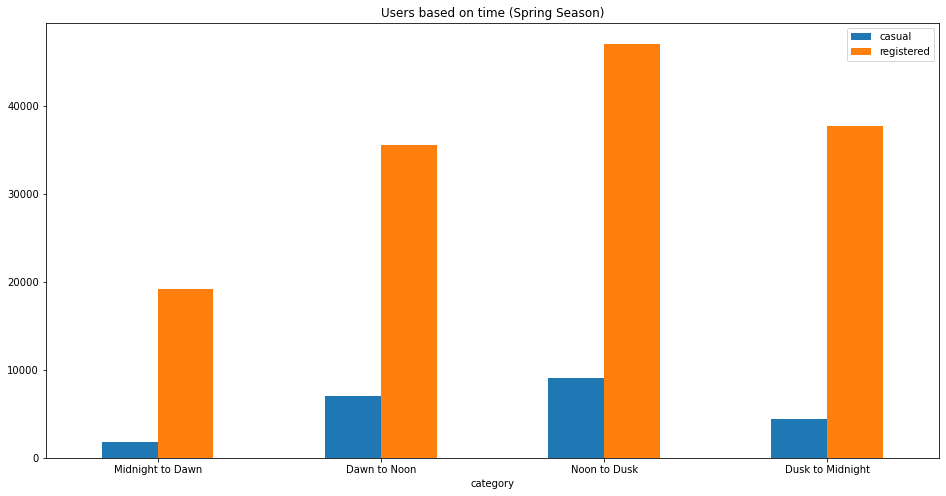

In [107]:
fig, ax = plt.subplots(figsize=(16,8))

spring_hr_df.plot(x='category', kind='bar', stacked=False, title='Users based on time (Spring Season)', rot=0, ax=ax)

<AxesSubplot:title={'center':'Users based on time (Spring Season)'}, xlabel='category'>

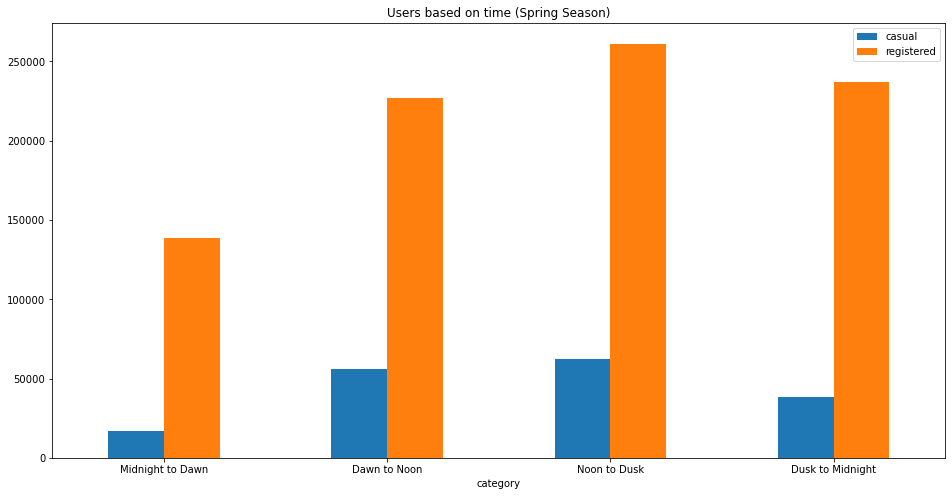

In [108]:
fig, ax = plt.subplots(figsize=(16,8))

summer_hr_df.plot(x='category', kind='bar', stacked=False, title='Users based on time (Spring Season)', rot=0, ax=ax)

<AxesSubplot:title={'center':'Users based on time (Spring Season)'}, xlabel='category'>

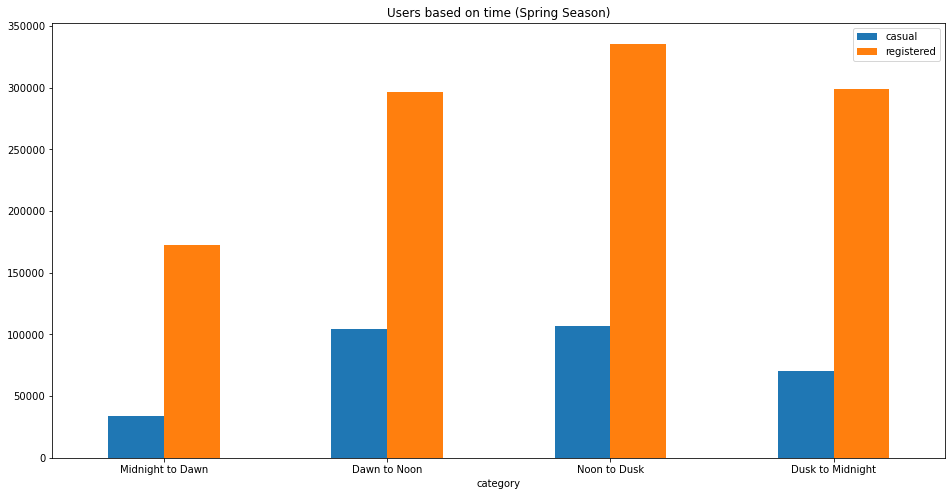

In [109]:
fig, ax = plt.subplots(figsize=(16,8))

fall_hr_df.plot(x='category', kind='bar', stacked=False, title='Users based on time (Spring Season)', rot=0, ax=ax)

<AxesSubplot:title={'center':'Users based on time (Spring Season)'}, xlabel='category'>

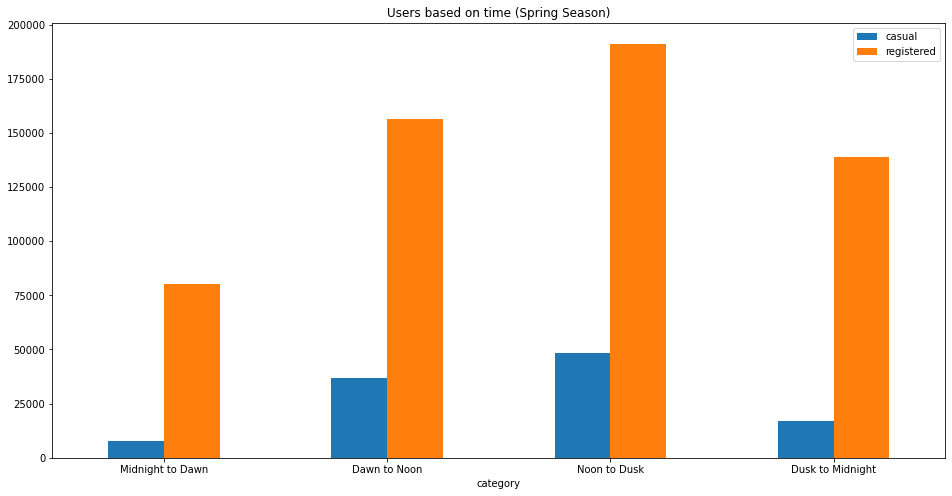

In [110]:
fig, ax = plt.subplots(figsize=(16,8))

winter_hr_df.plot(x='category', kind='bar', stacked=False, title='Users based on time (Spring Season)', rot=0, ax=ax)

## Conclusion

- Casual user lebih banyak meminjam sepeda pada hari Sabtu dan Minggu (Weekend). Sedangkan registered user lebih banyak meminjam sepeda pada Weekday.
- Musim gugur merupakan musim ter-favorit untuk meminjam sepeda. Sedangkan musim semi adalah musim tersepi dalam peminjaman sepeda.
- Peminjam sepeda lebih banyak meminjam sepeda pada suhu 12-25 derajat Celcius (Suhu yang dirasakan lebih hangat), dan pada kondisi cuaca cerah tidak mendung dan hujan.
- Pada semua waktu dan musim, waktu dari siang hari (12:00) hingga senja (18:00) adalah waktu favorit untuk meminjam sepeda.